# [pandas](https://pandas.pydata.org)

**pandas** è una libreria in Python per l'analisi e la manipolazione di dati veloce, potente, flessibile e facile da usare.

In [1]:
# L'opzione -y serve per accettare eventuali prompt del programma
# di installazione
import sys
!conda install pandas -y --prefix {sys.prefix}

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/giovanni/anaconda3/envs/stat4bigdata

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-2.2.2               |  py312h526ad5a_0        15.4 MB
    ------------------------------------------------------------
                                           Total:        15.4 MB

The following packages will be UPDATED:

  pandas                              2.2.1-py312h526ad5a_0 --> 2.2.2-py312h526ad5a_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
import pandas as pd

`pandas.DataFrame` è la principale struttura dati in pandas. Esso contiene dati in forma di tabelle bidimensionali, mutabili per dimensione e potenzialmente eterogenei, ordinati su righe e colonne etichettate.

In [4]:
df = pd.DataFrame({
    'nome': ['Alice', 'Bruno', 'Carlo'],
    'età': [21, 20, 17],
    'genere': ['f', 'm', 'm']
    })

In [5]:
df

,nome,età,genere
0,Alice,21,f
1,Bruno,20,m
2,Carlo,17,m


In [6]:
type(df)

pandas.core.frame.DataFrame

`pandas.Series` è un ndarray monodimensionale avente assi etichettate. L'oggetto supporta sia l'indicizzazione basata su interi che su etichette e fornisce una serie di metodi per eseguire operazioni sull'indice. I metodi statistici di ndarray sono stati sovrascritti per escludere automaticamente i dati mancanti (attualmente rappresentati come NaN).

In [10]:
df['nome']

0    Alice
1    Bruno
2    Carlo
Name: nome, dtype: object

In [11]:
type(df['nome'])

pandas.core.series.Series

In [12]:
df['età']

0    21
1    20
2    17
Name: età, dtype: int64

In [13]:
df['età'].dtype

dtype('int64')

In [14]:
df['età'].mean()

19.333333333333332

`describe` fornisce un sommario delle colonne di tipo numerico calcolando vari indici statistici (analogo al `summary` di `R`)

In [15]:
df.describe()

,età
count,3.000000
mean,19.333333
std,2.081666
min,17.000000
25%,18.500000
50%,20.000000
75%,20.500000
max,21.000000


Se si voglio includere anche le colonne non numeriche usare `include='all'`

In [16]:
df.describe(include = 'all')

,nome,età,genere
count,3,3.000000,3
unique,3,NaN,2
top,Alice,NaN,m
freq,1,NaN,2
mean,NaN,19.333333,NaN
std,NaN,2.081666,NaN
min,NaN,17.000000,NaN
25%,NaN,18.500000,NaN
50%,NaN,20.000000,NaN
75%,NaN,20.500000,NaN


Possiamo indicizzare un `DataFrame`in maniera molto simile a quanto fatto per gli array

In [17]:
# Confronto elemento per elemento della colonna
df['età'] >= 18

0     True
1     True
2    False
Name: età, dtype: bool

il metodo `loc` permette di indocizzare usando le etichette delle colonne oppure i booleani

In [18]:
# Tutte le colonne, solo righe dove età è >= 18
df.loc[df['età'] >= 18, :]

,nome,età,genere
0,Alice,21,f
1,Bruno,20,m


In [19]:
# Colonna nome, solo righe dove età è >= 18
df.loc[df['età'] >= 18, 'nome']

0    Alice
1    Bruno
Name: nome, dtype: object

In [23]:
df.iloc[ :2, 0] # Stesso risultato con indici numerici

0    Alice
1    Bruno
Name: nome, dtype: object

Si possono inserire nuove colonne assegnando come si farebbe per un dizionario

In [24]:
df['maggiorenne'] = df['età'] >= 18
df

,nome,età,genere,maggiorenne
0,Alice,21,f,True
1,Bruno,20,m,True
2,Carlo,17,m,False


## Dataset Titanic

I dati sono costituiti dalle informazioni demografiche e di viaggio di 1.309 passeggeri del Titanic; viene spesso utilizzato con l'obiettivo di prevedere la possibilità di sopravvivenza di questi passeggeri.

- *PassengerId*: id univoco di ogni passeggero
- *Survived*: valore booleano che indica se il passeggero è sopravvissuto (1) o no (0) 
- *Pclass*: classe in cui viaggiava il passeggero (1 = prima, 2 = seconda, 3 = terza)
- *Name*: nome del passeggero 
- *Sex*: maschio/femmina 
- *Age*: età
- *SibSp*: numero di fratelli/sorelle e coniugi a bordo 
- *Parch*: numero di genitori e figli a bordo
- *Ticket*: numero del biglietto
- *Fare*: costo del biglietto 
- *Cabin*: numero della cabina
- *Embarked*: porto di imbarco (C = Cherbourg; Q = Queenstown; S = Southampton)

pandas fornisce molti metodi per leggere dati in formato diverso, `read_csv` si usa per leggere tabelle salvate in formato `csv`

In [25]:
data = pd.read_csv('./data/titanic.csv')

In [26]:
# Mostra le prime 10 righe 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Controlliamo i tipi delle varie colonne

In [28]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Le variabili `Survived`, `PassengerId` e `Pclass` sono state importate come interi ma in realtà sono variabili categoriche pertanto è meglio rappresentarle come `object`. Per cambiare il tipo usiamo il metodo `astype`.

In [29]:
data['Survived'] = data['Survived'].astype('object')

In [31]:
data.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
data = data.astype({'PassengerId': 'object', 'Pclass': 'object'})

In [33]:
data.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Il metodo `info` restituisce informazioni riguardo il dataset come per esempio il numero di eventuali dati mancanti

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


Vediamo prima il riassunto delle colonne non numeriche

In [35]:
data.describe(include = 'object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,1,0,3,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,549,491,1,577,7,4,644


Poi di quelle numeriche

In [36]:
data.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Vediamo ora di analizzare qualche aspetto di questo dataset. Abbiamo detto che la colonna survived rappresenta il fatto che un passeggero sia sopravvissuto oppure no

In [37]:
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: object

In [38]:
data['Survived'].unique()

array([0, 1], dtype=object)

Ricaviamo la tabella di frequenze.

In [39]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Possiamo anche rappresentarla con un bar plot

In [40]:
import matplotlib.pyplot as plt

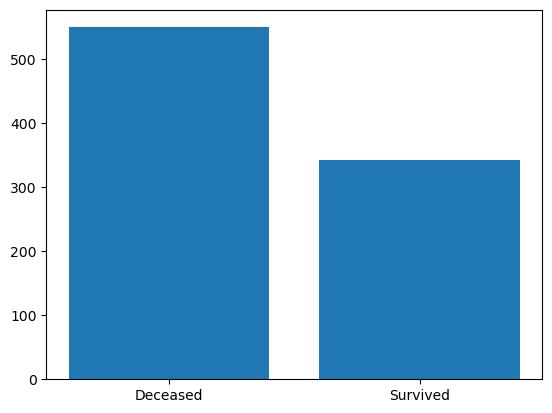

In [41]:
plt.bar(["Deceased", "Survived"],
        height = data['Survived'].value_counts())
plt.show()

Ripetiamo la stessa cosa con la variabile `Pclass` che rappresenta la classe in cui il passeggero viaggiava

In [42]:
data['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: object

In [43]:
data['Pclass'].unique()

array([3, 1, 2], dtype=object)

In [44]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

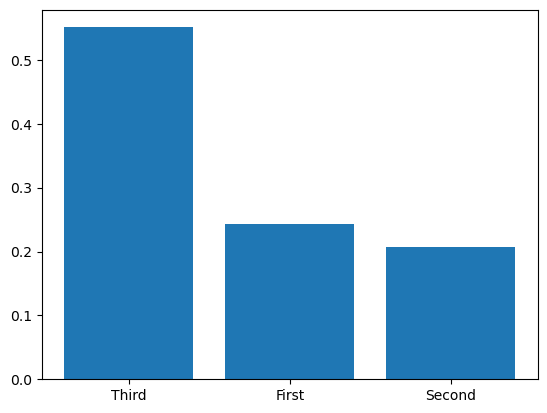

In [45]:
tot = data['Pclass'].value_counts().sum()
plt.bar(["Third", "First", "Second"],
        height = data['Pclass'].value_counts()/tot)
plt.show()

Per esempio se ora volessimo concentrarci sui passeggeri di prima e seconda classe potremmo usare il seguente comando per estrarre le righe opportune.

In [46]:
data['Pclass'].isin([1, 2])

0      False
1       True
2      False
3       True
4      False
       ...  
886     True
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

`isin` controlla riga per riga se l'elemento sta nella lista passata come argomento e restituisce `True` o `False` a seconda del caso.

In [47]:
# sottotabella dei passeggeri di prima e seconda classe
data.loc[data['Pclass'].isin([1, 2]), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Ora per esempio vogliamo confrontare le percetuali di sopravvisstuti fra le varie classi

In [48]:
p1 = data[data["Pclass"] == 1]["Survived"].mean()
p2 = data[data["Pclass"] == 2]["Survived"].mean()
p3 = data[data["Pclass"] == 3]["Survived"].mean()

print(p1, p2, p3)

0.6296296296296297 0.47282608695652173 0.24236252545824846


Notiamo che le proporzioni di sporavvisuti sono parecchio diverse a seconda della classe.

Avremmo potuto accorgergene anche raggruppando i dati per classe prima di calcolare la media.

In [49]:
data.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [50]:
data.groupby("Pclass")["Survived"].mean()

Pclass
1     0.62963
2    0.472826
3    0.242363
Name: Survived, dtype: object

Infine pandas possiede molti metodi per generare grafici. In questo caso potremmo usare dei boxplot per comparare le distribuzioni del costo del biglietto a seconda della classe.

<Figure size 640x480 with 0 Axes>

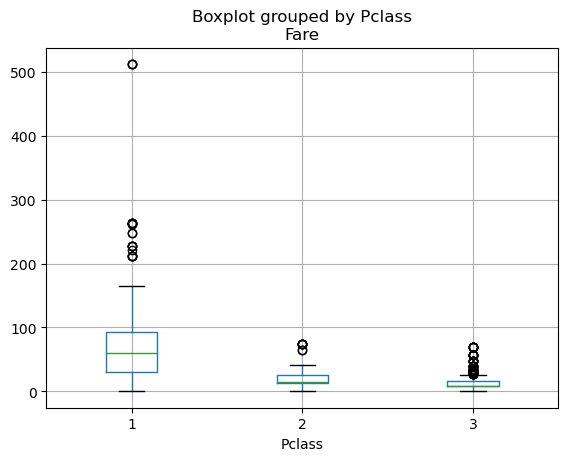

In [51]:
plt.figure()
data.boxplot(column = 'Fare', by = 'Pclass')
plt.show()

Con groupby possiamo anche aggregare le colonne nei gruppi specificando le quantità da calcolare: per esempio media, std, min e max per `Fare` e solo min per `Age`.

In [52]:
data[['Pclass', 'Fare', 'Age']] \
    .groupby('Pclass') \
    .agg({'Fare': ['mean', 'std', 'min', 'max'], 'Age': 'min'})

Fare                             Age
             mean        std  min       max   min
Pclass                                           
1       84.154687  78.380373  0.0  512.3292  0.92
2       20.662183  13.417399  0.0   73.5000  0.67
3       13.675550  11.778142  0.0   69.5500  0.42

Infine con pandas possiamo anche ottenere bar plot e scatter plot senza passare da matplotlib.

In [56]:
df = data.groupby("Pclass")["Survived"].mean()
df

Pclass
1     0.62963
2    0.472826
3    0.242363
Name: Survived, dtype: object

In [57]:
df = df.reset_index()
df

,Pclass,Survived
0,1,0.62963
1,2,0.472826
2,3,0.242363


<Figure size 640x480 with 0 Axes>

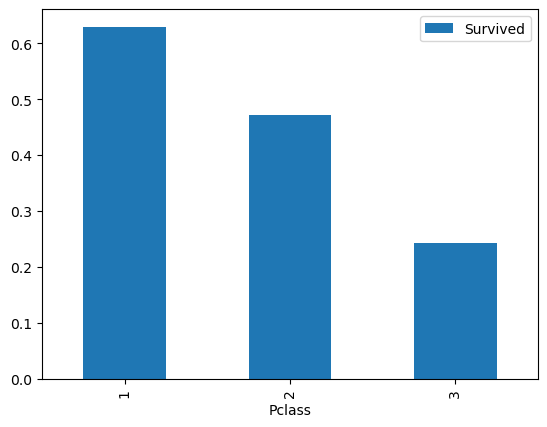

In [58]:
plt.figure()
df.plot.bar(x = "Pclass")
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

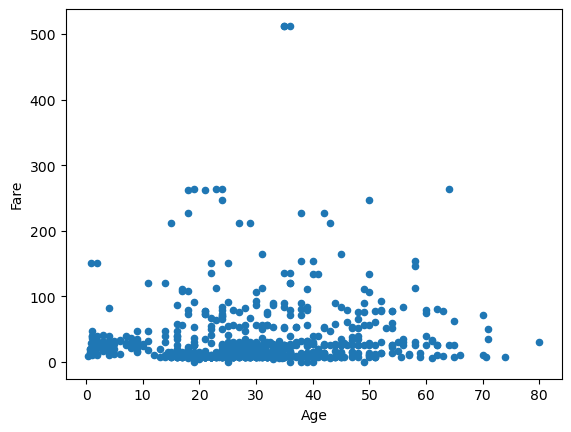

In [59]:
data.plot.scatter(x = 'Age', y = 'Fare')

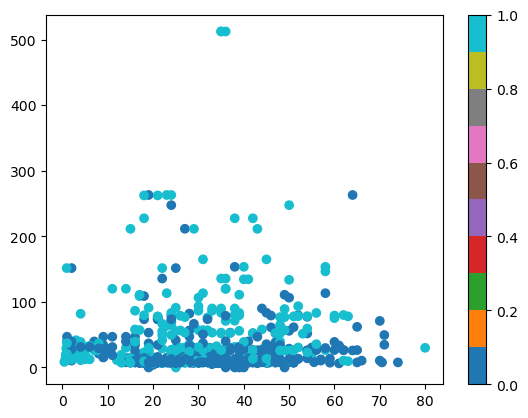

In [68]:
plt.figure()
plt.scatter(data["Age"], data["Fare"],
           c = data["Survived"],
           cmap = "tab10")
plt.colorbar()
plt.show()

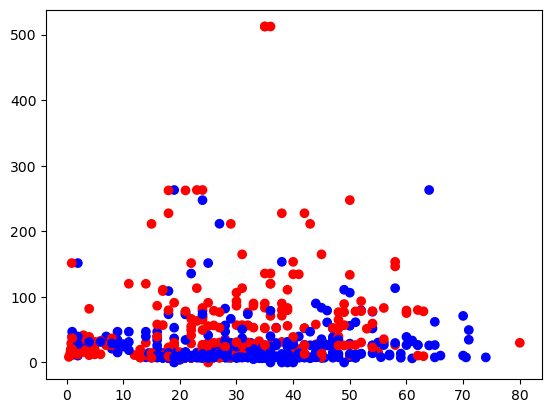

In [71]:
plt.figure()
plt.scatter(data["Age"], data["Fare"],
           c = ["blue" if i == 0 else "red" for i in data["Survived"]])
plt.show()

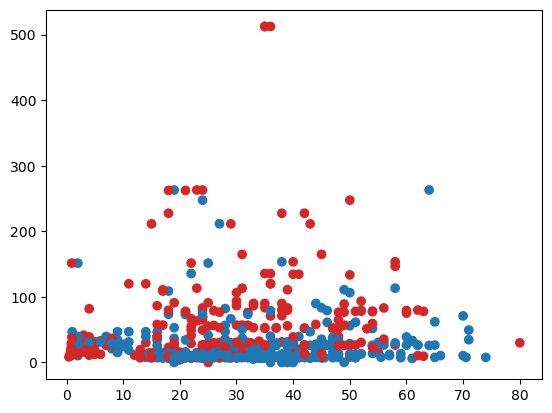

In [77]:
plt.figure()
plt.scatter(data["Age"], data["Fare"],
           c = ["C0" if i == 0 else "C3" for i in data["Survived"]])
plt.show()

## Esercizi

Sempre rigurado il dataset `titanic` calcolare:
- l'età media e massima a seconda della classe
- l'età media a seconda della sopravvivenza
- l'età media a seconda del sesso
- il costo medio del biglietto a seconda del sesso

Plottare con grafici a barre:
- l'età media a seconda del sesso
- il costo medio del biglietto a seconda del sesso

Plottare con boxplot:
- la distribuzione dell'età a seconda del sesso
- la distribuzione del costo del biglietto a seconda del sesso

Aggiungere una colonna `AgeClass` che valga "children" per i passeggeri con meno di 18 anni e "adult" per quelli con più di 18 anni.

In [78]:
# L'etò media massima a seconda della classe:
data.groupby("Pclass").agg({"Age": ["mean", "max"]})

Age      
             mean   max
Pclass                 
1       38.233441  80.0
2       29.877630  70.0
3       25.140620  74.0

In [79]:
# L'etò media a seconda della sopravvivenza:
#data.groupby("Survived")["Age"].mean()
data.groupby("Survived").agg({"Age": ["mean"]})

,Age
,mean
Survived,
0,30.626179
1,28.343690


In [80]:
# L'etò media a seconda del genere:
data.groupby("Sex").agg({"Age": ["mean"]})

,Age
,mean
Sex,
female,27.915709
male,30.726645


<Axes: title={'center': 'Age'}, xlabel='Sex'>

<Figure size 640x480 with 0 Axes>

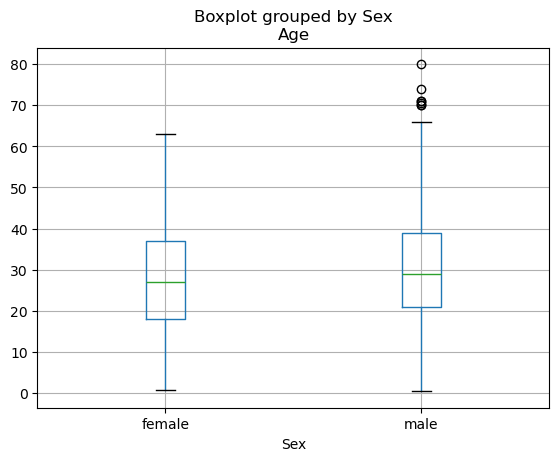

In [81]:
plt.figure()
data.boxplot(column = "Age", by = "Sex")

<Axes: title={'center': 'Fare'}, xlabel='Sex'>

<Figure size 640x480 with 0 Axes>

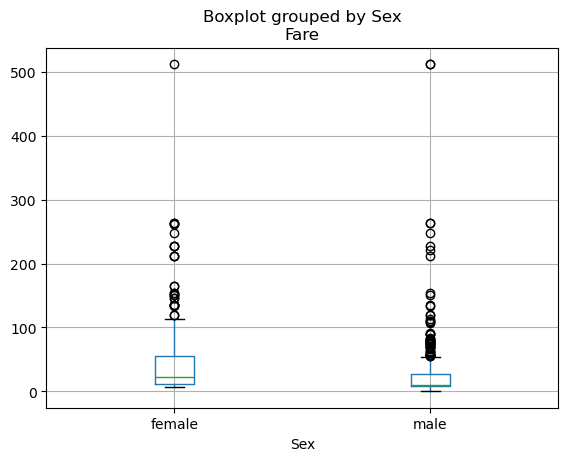

In [82]:
plt.figure()
data.boxplot(column = "Fare", by = "Sex")

<Axes: xlabel='Sex'>

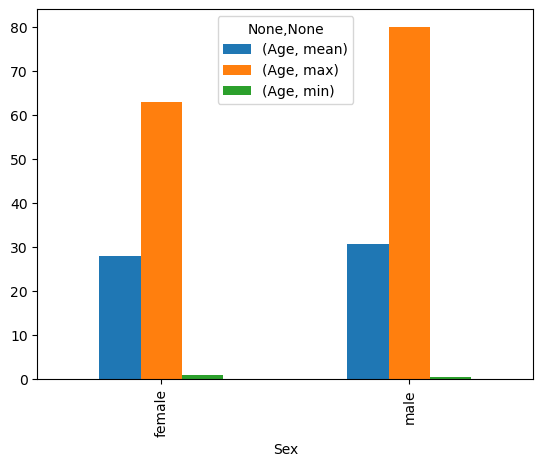

In [89]:
# L'etò media a seconda del genere:
df = data.groupby("Sex").agg({"Age": ["mean", "max", "min"]})
df = df.reset_index()
df.plot.bar(x = "Sex")

<Axes: xlabel='Sex'>

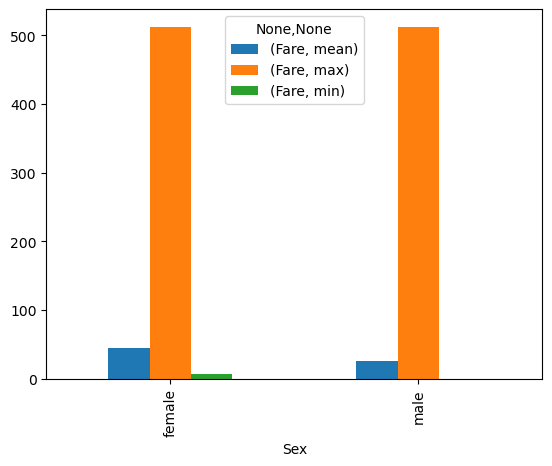

In [90]:
# L'etò media a seconda del genere:
df = data.groupby("Sex").agg({"Fare": ["mean", "max", "min"]})
df = df.reset_index()
df.plot.bar(x = "Sex")

Il DataFrame `cars` contiene le seguenti variabili:
  1. **symboling:**              -3, -2, -1, 0, 1, 2, 3.
  2. **normalized-losses:**        continuous from 65 to 256.
  3. **make:**                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. **fuel-type:**                diesel, gas.
  5. **aspiration:**               std, turbo.
  6. **num-of-doors:**             four, two.
  7. **body-style:**               hardtop, wagon, sedan, hatchback, convertible.
  8. **drive-wheels:**             4wd, fwd, rwd.
  9. **engine-location:**          front, rear.
 10. **wheel-base:**               continuous from 86.6 to 120.9.
 11. **length:**                   continuous from 141.1 to 208.1.
 12. **width:**                    continuous from 60.3 to 72.3.
 13. **height:**                   continuous from 47.8 to 59.8.
 14. **curb-weight:**              continuous from 1488 to 4066.
 15. **engine-type:**              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. **num-of-cylinders:**         eight, five, four, six, three, twelve, two.
 17. **engine-size:**              continuous from 61 to 326.
 18. **fuel-system:**              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. **bore:**                     continuous from 2.54 to 3.94.
 20. **stroke:**                   continuous from 2.07 to 4.17.
 21. **compression-ratio:**        continuous from 7 to 23.
 22. **horsepower:**               continuous from 48 to 288.
 23. **peak-rpm:**                 continuous from 4150 to 6600.
 24. **city-mpg:**                 continuous from 13 to 49.
 25. **highway-mpg:**              continuous from 16 to 54.
 26. **price:**                    continuous from 5118 to 45400.

Calcolare:
- Una nuova colonna `volume` ottenuta come prodotto di `lenght`, `width` e `height`.
- il prezzo medio a seconda del produttore
- i cavalli (horsepower) medi a seconda del tipo di motore (engine-type)
- il prezzo medio delle Volvo sotto i 100 cavalli.
- i cavalli massimi delle Porsche sopra i 90 cavalli.

Rappresentare:
- I cavalli in funzione del volume
- Il prezzo in funzione del volume
- La distribuzione del prezzo a seconda del produttore
- La distribuzione di `lenght` a seconda del `body-style`
- La dimensione media del motore a seconda del tipo di motore.

In [ ]:
cars = pd.read_csv("data/cars.csv")